In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('data.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [18]:
df.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [19]:
df.shape

(1388, 5)

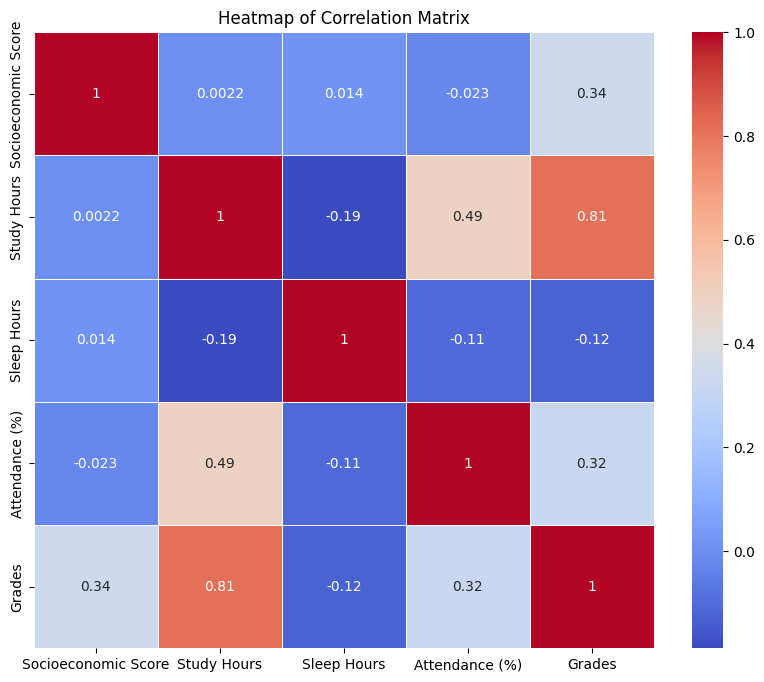

In [20]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [21]:
df.columns

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')

In [22]:
df = df[['Study Hours', 'Attendance (%)', 'Socioeconomic Score','Grades',]]

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized.head())

   Study Hours  Attendance (%)  Socioeconomic Score    Grades
0     0.282609        0.216667             0.953703  0.254237
1     0.260870        0.250000             0.839562  0.050847
2     0.260870        0.016667             0.644345  0.000000
3     0.260870        0.116667             0.175930  0.033898
4     0.326087        0.583333             0.560008  0.016949


In [24]:
from sklearn.model_selection import train_test_split

X = df_normalized[['Study Hours']]
y = df_normalized['Grades']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 1110
Testing set size: 278


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense



In [26]:
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.summary()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
              loss='mean_squared_error')

X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

history = model.fit(X_train_reshaped, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_data=(X_test_reshaped, y_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0437 - val_loss: 0.0330
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0397 - val_loss: 0.0327
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409 - val_loss: 0.0324
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0422 - val_loss: 0.0321
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0368 - val_loss: 0.0318
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0418 - val_loss: 0.0315
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0421 - val_loss: 0.0311
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0364 - val_loss: 0.0309
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0408 - val_loss: 0.0305
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0392 - val_loss: 0.0302
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0377 - val_loss: 0.0299
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0372 - val_l

In [28]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Convert MSE to percentage
mse_percentage = mse * 100
print("Mean Squared Error (Percentage):", mse_percentage)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Squared Error (Percentage): 3.331978909239635


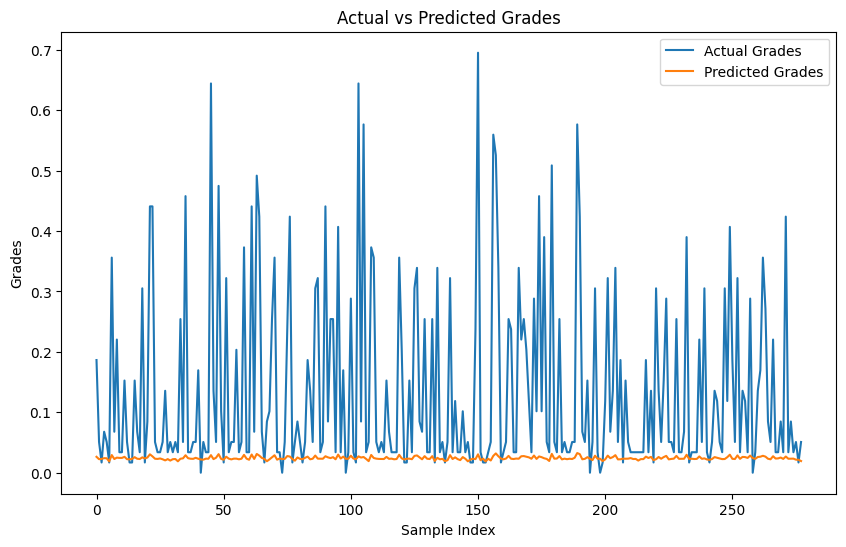

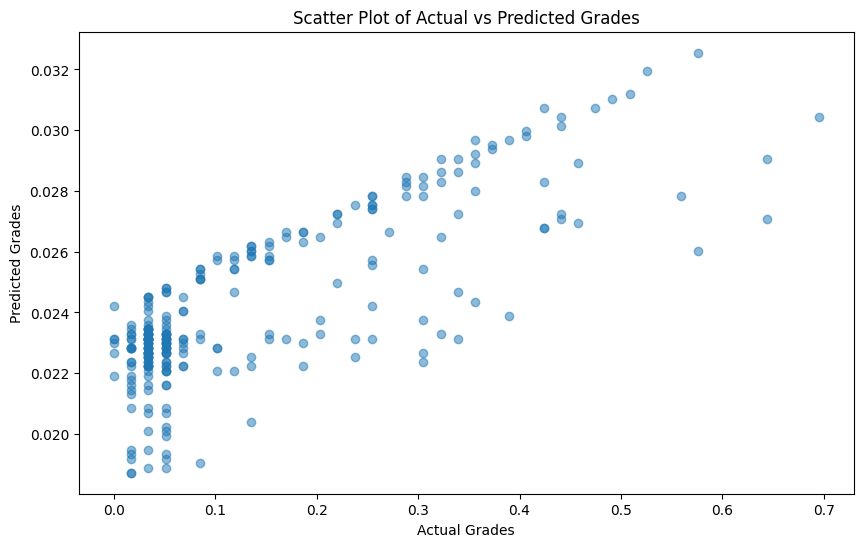

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Grades')
plt.plot(y_pred, label='Predicted Grades')
plt.xlabel('Sample Index')
plt.ylabel('Grades')
plt.title('Actual vs Predicted Grades')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Scatter Plot of Actual vs Predicted Grades')
plt.show()

Mean Squared Error (Linear Regression): 0.008106609848342447
R^2 Score (Linear Regression): 0.6261386807089997


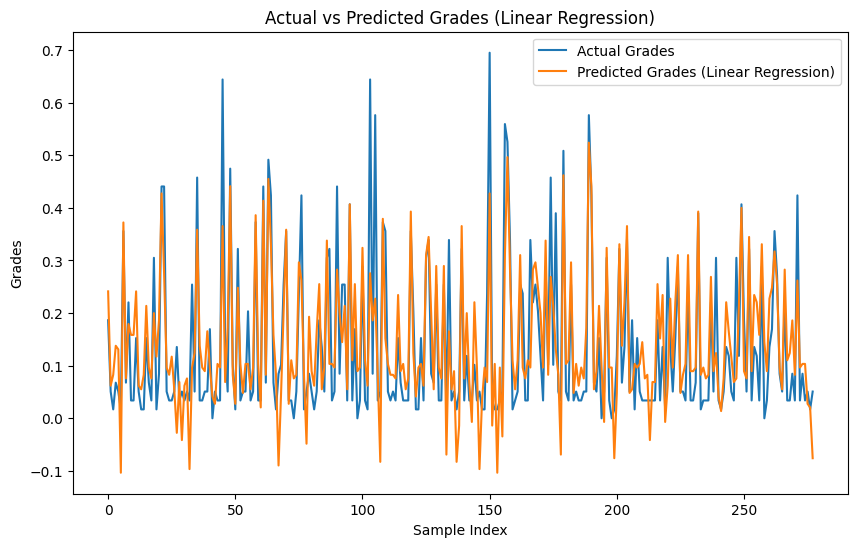

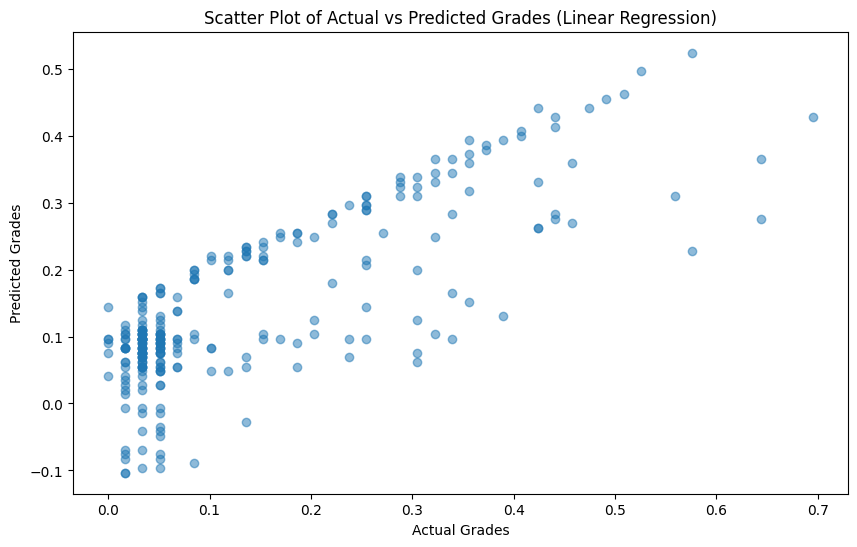

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("R^2 Score (Linear Regression):", r2_linear)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Grades')
plt.plot(y_pred_linear, label='Predicted Grades (Linear Regression)')
plt.xlabel('Sample Index')
plt.ylabel('Grades')
plt.title('Actual vs Predicted Grades (Linear Regression)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Scatter Plot of Actual vs Predicted Grades (Linear Regression)')
plt.show()

Mean Squared Error (Random Forest): 0.007213427983331255
R^2 Score (Random Forest): 0.6673305175763133


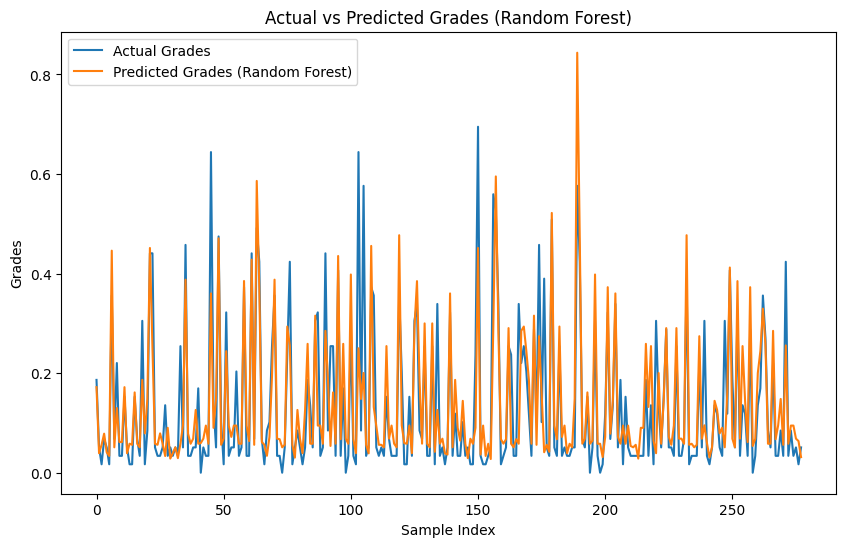

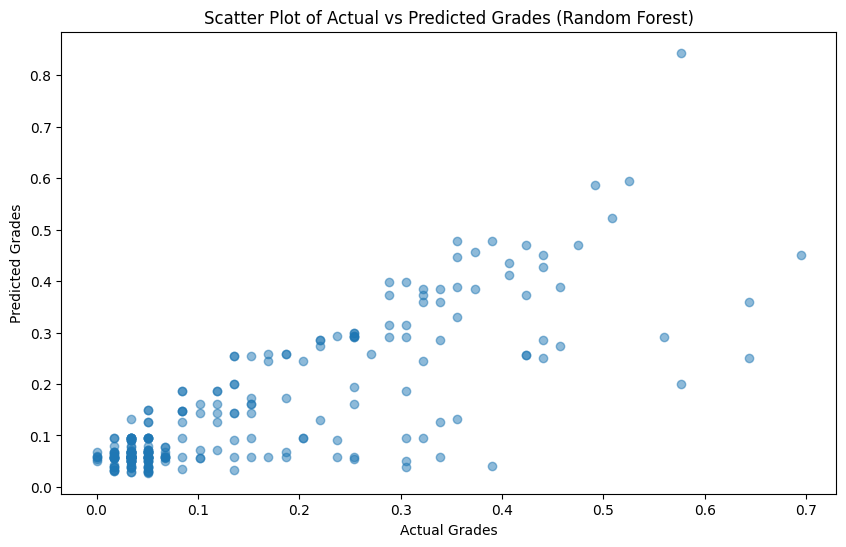

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse_rf)
print("R^2 Score (Random Forest):", r2_rf)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Grades')
plt.plot(y_pred_rf, label='Predicted Grades (Random Forest)')
plt.xlabel('Sample Index')
plt.ylabel('Grades')
plt.title('Actual vs Predicted Grades (Random Forest)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Scatter Plot of Actual vs Predicted Grades (Random Forest)')
plt.show()

Mean Squared Error (Gradient Boosting): 0.0073295036076318435
R^2 Score (Gradient Boosting): 0.6619773321078629


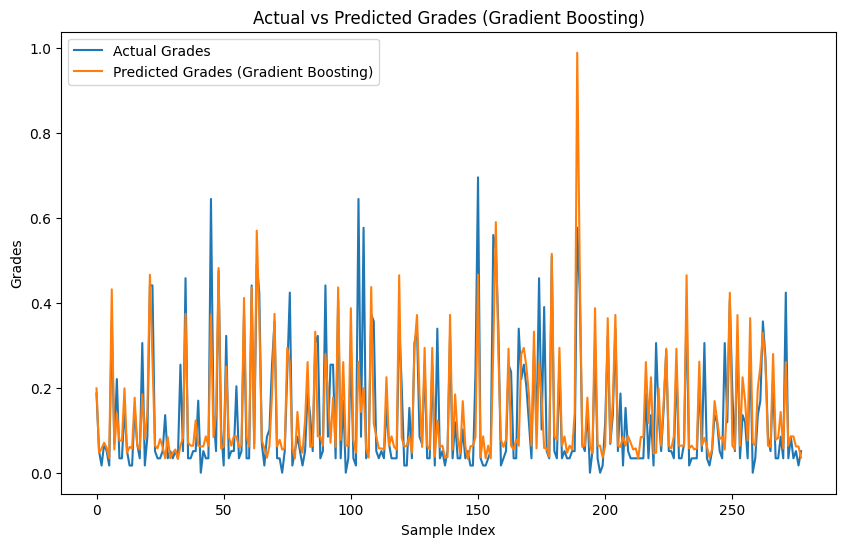

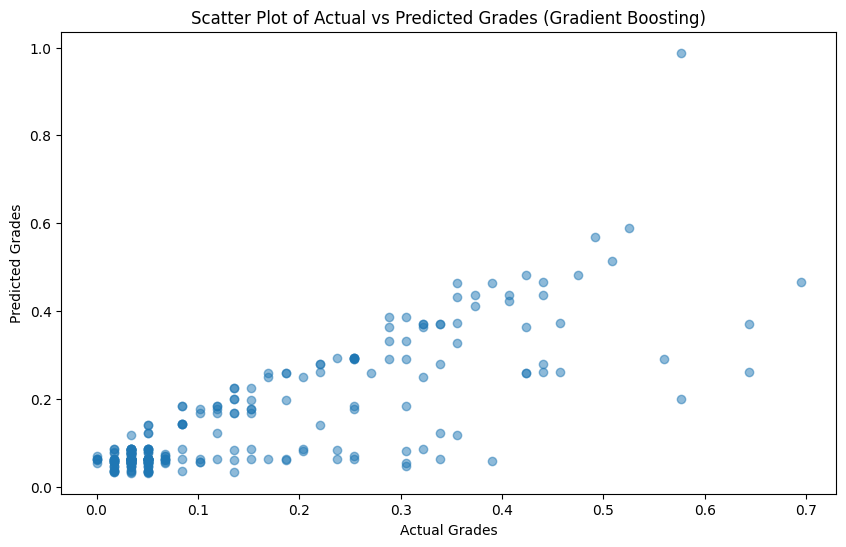

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("R^2 Score (Gradient Boosting):", r2_gb)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Grades')
plt.plot(y_pred_gb, label='Predicted Grades (Gradient Boosting)')
plt.xlabel('Sample Index')
plt.ylabel('Grades')
plt.title('Actual vs Predicted Grades (Gradient Boosting)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Scatter Plot of Actual vs Predicted Grades (Gradient Boosting)')
plt.show()